In [1]:
from methods.our_method import Our_method
from methods.trans_lasso import Trans_lasso
from methods.t_lasso import T_lasso
from evaluator.evaluator import *
from evaluator.sample_generator import *
from tqdm import tqdm
from matplotlib import pyplot as plt
import time
import numpy as np

In [2]:
n_features=16
n_samples=100
n_packs=101
s=16

In [3]:
models=[Our_method(n_features,s,1),T_lasso(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(100):
            sample_packs,coef_true=t11_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('result_list.npy',result_list)

  9%|▉         | 1/11 [05:23<53:57, 323.78s/it]

array([[[0.17022458, 0.12582764, 0.22111923, 0.16141617, 0.32133548],
        [0.18136849, 0.14715686, 0.23509316, 0.16678069, 0.30278854]]])

In [12]:
result_list[0][0]

[[0.33284616740628004,
  0.22327671336741325,
  0.1828746666662345,
  0.17668350869750593,
  0.2038033472434566,
  0.20146907501513467,
  0.07768337073251103,
  0.1724670517232652,
  0.1281843483515276,
  0.20236600697418083,
  0.36556719739661836,
  0.21894198553193123,
  0.14593615797548135,
  0.310342591631055,
  0.2107718077167823,
  0.19966300930079928,
  0.10718411653844058,
  0.10377450709065811,
  0.30104534837588043,
  0.29494748572924473],
 [0.3391691062346366,
  0.20900832060776814,
  0.17521586146166526,
  0.1709725728373754,
  0.2352727853228046,
  0.20901399198284348,
  0.08249091417919702,
  0.18849882755385905,
  0.14509877807211552,
  0.21884228092916627,
  0.3672547824232815,
  0.24087203893314424,
  0.11972379075725886,
  0.3040856741541847,
  0.22862095792418646,
  0.20924158635610376,
  0.125764865535579,
  0.1041984778736489,
  0.34663357402661366,
  0.33014466003169407]]

In [9]:
result=result.reshape((3,13,10,3))
#在第三维上求平均
result=np.mean(result,axis=2)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

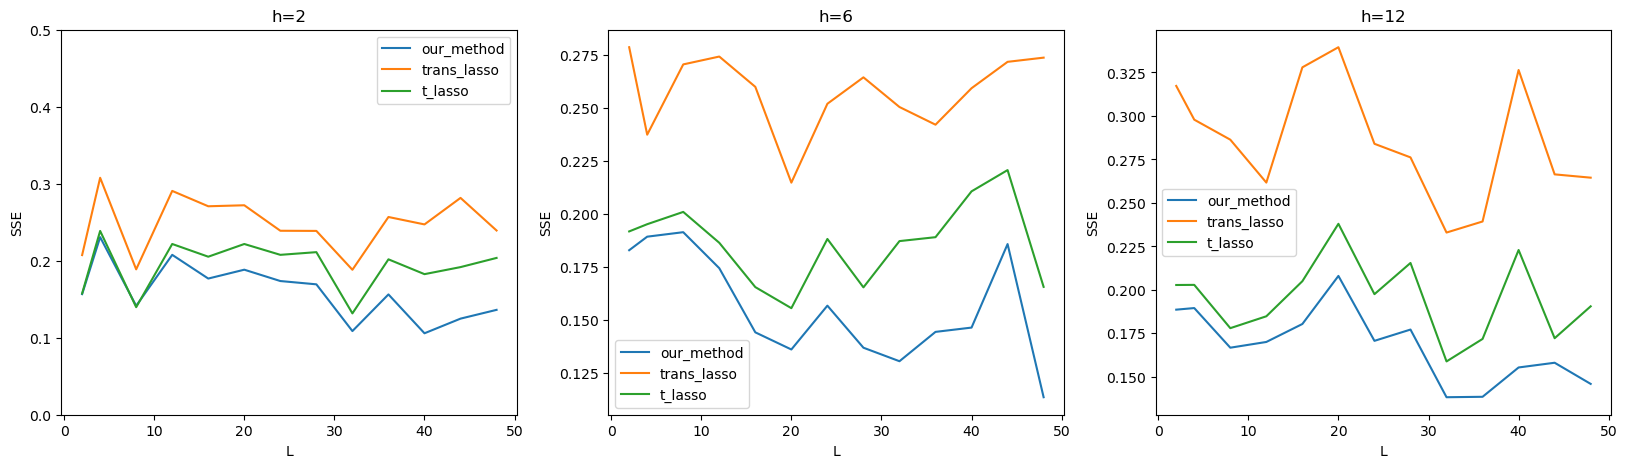

In [10]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40,44,48],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40,44,48],result[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40,44,48],result[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40,44,48],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40,44,48],result[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40,44,48],result[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=6')

plt.subplot(1,3,3)
plt.plot([2,4,8,12,16,20,24,28,32,36,40,44,48],result[2,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40,44,48],result[2,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40,44,48],result[2,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=12') 

#设置图像大小
plt.show()